In [2]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
import mne
import funcs4eeg as fe
import re
import imp
import ast
imp.reload(fe)

C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_33780\28976486.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [385]:
real_to_pick = [1, 3, 5, 9, 18]	
sham_to_pick = [6, 10, 11, 15, 16]
case= '3 | 4'
watch='11 stim'
tmin = -0.1
tmax = 0.4
real_evoked_before = []
real_evoked_after = []
sham_evoked_before = []
sham_evoked_after = []

In [386]:
for subject_id in real_to_pick:
    evoked_before, evoked_after = fe.pipeline_evoked_response(subject_id, case, watch, tmin, tmax)
    real_evoked_before.append(evoked_before)
    real_evoked_after.append(evoked_after)

for subject_id in sham_to_pick:
    evoked_before, evoked_after = fe.pipeline_evoked_response(subject_id, case, watch, tmin, tmax)
    sham_evoked_before.append(evoked_before)
    sham_evoked_after.append(evoked_after)

real_evoked_before = np.array(real_evoked_before)
real_evoked_after = np.array(real_evoked_after)
sham_evoked_before = np.array(sham_evoked_before)
sham_evoked_after = np.array(sham_evoked_after)

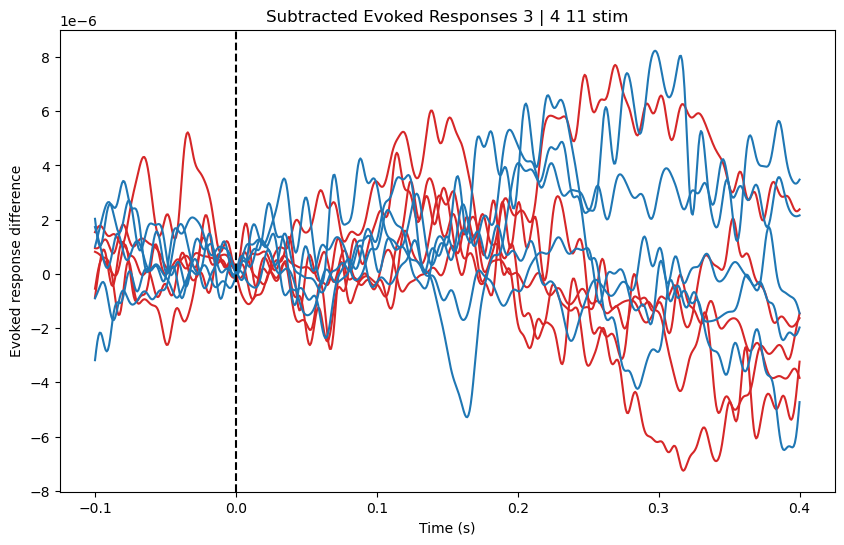

In [387]:
# Subtract the 'before' data from the 'after' data
real_evoked_sub = np.subtract(real_evoked_after, real_evoked_before)
sham_evoked_sub = np.subtract(sham_evoked_after, sham_evoked_before)
real_evoked_sub = fe.low_pass_filter(real_evoked_sub, sfreq=1200, cutoff=100, order=5)
sham_evoked_sub = fe.low_pass_filter(sham_evoked_sub, sfreq=1200, cutoff=100, order=5)

# Create a new time array for the subtracted data
# (Assuming the time dimension is still the same length as before)
time = np.linspace(tmin, tmax, real_evoked_sub.shape[-1])

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot subtracted real data
for i in range(real_evoked_sub.shape[0]):
    plt.plot(time, real_evoked_sub[i, :], color='#d62728')

# Plot subtracted sham data
for i in range(sham_evoked_sub.shape[0]):
    plt.plot(time, sham_evoked_sub[i, :], color='#1f77b4')

# Add a vertical dashed line at time=0s
plt.axvline(x=0, color='k', linestyle='--')

# Add labels and a title
plt.title('Subtracted Evoked Responses'+' '+case+' '+watch)
plt.xlabel('Time (s)')
plt.ylabel('Evoked response difference')

# Display the plot
plt.show()


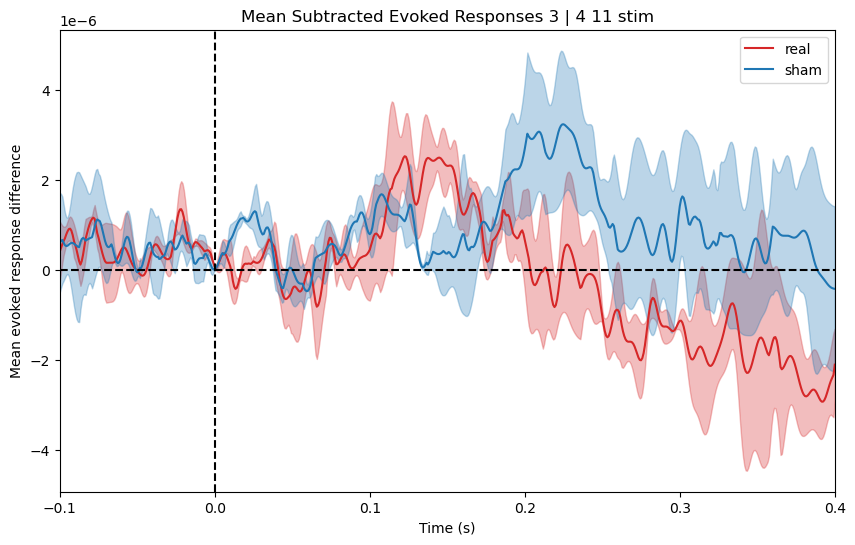

In [388]:
# Calculate the mean and standard deviation
real_mean, real_std = fe.trimmed_mean_std(real_evoked_sub, axis=0)
sham_mean, sham_std = fe.trimmed_mean_std(sham_evoked_sub, axis=0)

# # Calculate the mean and standard deviation
# real_mean = np.mean(real_evoked_sub, axis=0)
# real_std = np.std(real_evoked_sub, axis=0)

# sham_mean = np.mean(sham_evoked_sub, axis=0)
# sham_std = np.std(sham_evoked_sub, axis=0)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the mean for real and sham data with shaded std deviation
plt.plot(time, real_mean, color='#d62728', label='real')
plt.fill_between(time, real_mean - real_std, real_mean + real_std, color='#d62728', alpha=0.3)

plt.plot(time, sham_mean, color='#1f77b4', label='sham')
plt.fill_between(time, sham_mean - sham_std, sham_mean + sham_std, color='#1f77b4', alpha=0.3)

# Add a vertical dashed line at time=0s
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')


# Add labels, a title, and a legend
plt.title('Mean Subtracted Evoked Responses'+' '+case+' '+watch)
plt.xlim([time[0], time[-1]])
plt.xlabel('Time (s)')
plt.ylabel('Mean evoked response difference')
plt.legend()

# Display the plot
plt.show()


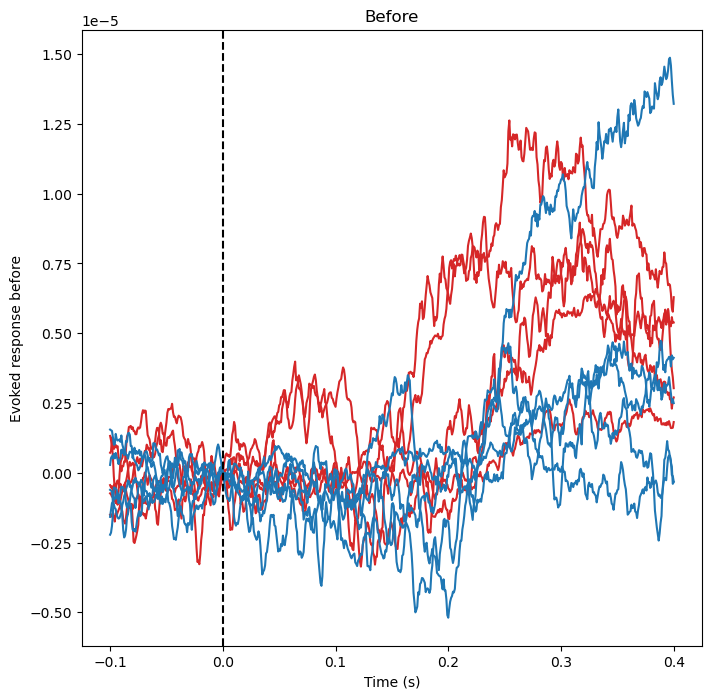

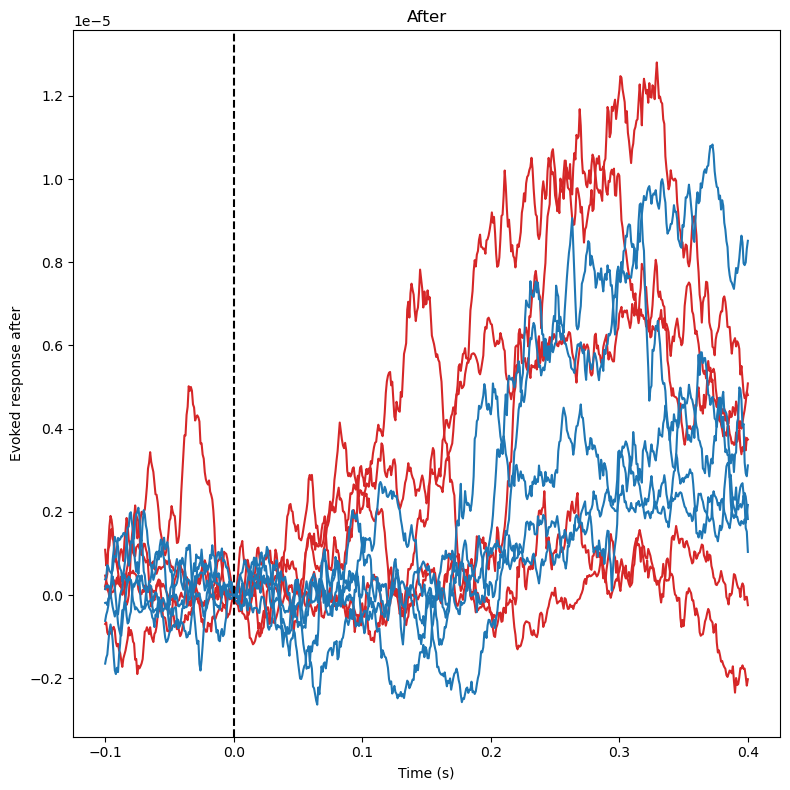

In [389]:
# Assuming that your data is arranged such that the time dimension is the last one.
# And that the length of the time dimension is 100 (change it to your actual size).
time = np.linspace(tmin, tmax, real_evoked_before.shape[-1])

# Plot before
plt.figure(figsize=(8, 8))
for i in range(real_evoked_before.shape[0]):
    plt.plot(time, real_evoked_before[i, :], color='#d62728')
for i in range(sham_evoked_before.shape[0]):
    plt.plot(time, sham_evoked_before[i, :], color='#1f77b4')
plt.axvline(x=0, color='k', linestyle='--')  # add a vertical dashline at time=0s.
plt.title('Before')
plt.xlabel('Time (s)')
plt.ylabel('Evoked response before')
plt.show()


# Plot after
plt.figure(figsize=(8, 8))
for i in range(real_evoked_after.shape[0]):
    plt.plot(time, real_evoked_after[i, :], color='#d62728')
for i in range(sham_evoked_after.shape[0]):
    plt.plot(time, sham_evoked_after[i, :], color='#1f77b4')
plt.axvline(x=0, color='k', linestyle='--')  # add a vertical dashline at time=0s.
plt.title('After')
plt.xlabel('Time (s)')
plt.ylabel('Evoked response after')

plt.tight_layout()
plt.show()


In [390]:
# evoked_before.plot_topo()